In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Traffic data
The traffic data that is imported here is taken from the **TrafficDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a data dictionary with data requirements. 
### Importing the data

In [2]:
traffic_data = pd.read_csv("datasets/CleanTraffic.csv")
traffic_data.sample(3)

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
644552,2666245,2019-10-31,2019-10-31,17:29:00,18:03:46,109.450,3148.13,34.767,12.8,10.8,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 35],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2019-10-31 17:29:00,2019-10-31 18:03:46
552476,3006586,2022-04-29,2022-04-29,13:57:27,14:05:02,18.200,2400.00,7.583,43.3,45.6,...,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 8],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-04-29 13:57:27,2022-04-29 14:05:02
1116877,2409708,2018-09-27,2018-09-27,9:45:00,9:57:56,25.867,2000.00,12.933,40.5,38.5,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-09-27 09:45:00,2018-09-27 09:57:56


In [3]:
traffic_data.shape

(1581413, 28)

### Checking the data types and missing values

In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581413 entries, 0 to 1581412
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TrafficJamNum        1581413 non-null  int64  
 1   StartDate            1581413 non-null  object 
 2   EndDate              1581413 non-null  object 
 3   StartTime            1581413 non-null  object 
 4   EndTime              1581413 non-null  object 
 5   Severity             1581413 non-null  float64
 6   Length               1581413 non-null  float64
 7   Duration             1581413 non-null  float64
 8   HectometerStart      1581413 non-null  float64
 9   HectometerEnd        1581413 non-null  float64
 10  RoadLetter           1581413 non-null  object 
 11  RoadNumber           1581413 non-null  int64  
 12  RoadDescr            1581413 non-null  object 
 13  HectometerDirection  1581413 non-null  object 
 14  RoadSectionFrom      1581413 non-null  object 
 15

In [5]:
traffic_data.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

### Altering data
#### Adding hour

In [6]:
traffic_data['Hour'] = traffic_data['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_data.sample(3)

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
57059,3819613,2023-11-13,2023-11-13,7:58:28,8:35:04,122.885,3358.000,36.600,75.3,77.5,...,[Geen oorzaakcode opgegeven door VWM 37],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-11-13 07:58:28,2023-11-13 08:35:04,7
1047400,1928102,2016-05-13,2016-05-13,15:53:00,18:04:39,429.567,3262.945,131.650,109.0,107.0,...,[Geen oorzaakcode opgegeven door VWM 132],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2016-05-13 15:53:00,2016-05-13 18:04:39,15
639646,2641384,2019-10-05,2019-10-05,17:14:00,17:37:50,49.483,2076.224,23.833,54.3,57.3,...,[Geen oorzaakcode opgegeven door VWM 24],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2019-10-05 17:14:00,2019-10-05 17:37:50,17


#### Keeping only relevant roads

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.
An important observation is that **A2 leads from Sittard to 's-Hertogenbosch** and vice versa, whereas **A73 leads from Sittard to Boxmeer** and vice versa. Other routes are also possible, but they are significantly slower. Therefore, it is better to focus on those two only for now. Furthermore, they have been suggested by the client as the optimal routes.

In [7]:
filtered_traffic= traffic_data[(traffic_data['RoadDescr'] == 'A73') | (traffic_data['RoadDescr'] == 'A2')]
filtered_traffic.sample(3)

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
1213299,1799942,2015-09-24,2015-09-24,9:09:00,9:21:44,25.467,2000.000,12.733,55.7,57.7,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2015-09-24 09:09:00,2015-09-24 09:21:44,9
1329349,2265431,2017-12-14,2017-12-14,8:44:00,8:49:54,11.800,2000.000,5.900,239.4,237.4,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2017-12-14 08:44:00,2017-12-14 08:49:54,8
949155,2236071,2017-11-02,2017-11-02,7:19:00,7:26:25,20.133,2714.607,7.417,176.8,179.8,...,[Geen oorzaakcode opgegeven door VWM 7],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2017-11-02 07:19:00,2017-11-02 07:26:25,7


In [8]:
denb=filtered_traffic[(filtered_traffic["MainRoadFrom"] == "'s-Hertogenbosch")&(filtered_traffic["MainRoadTo"] == "Utrecht")]
denb["HectometerDirection"].unique()

array(['aflopend'], dtype=object)

### Making the direction numerical
0 = Morning (Sittard - Den Bosch)

1 = Afternoon (Den Bosch - Sittard)

In [9]:
filtered_traffic.loc[filtered_traffic["HectometerDirection"]=="oplopend", 'HectometerDirectionNum'] = 1
filtered_traffic.loc[filtered_traffic["HectometerDirection"]=="aflopend", 'HectometerDirectionNum'] = 0

filtered_traffic.sample(3)

C:\Users\zashe\AppData\Local\Temp\ipykernel_17296\1781117567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_traffic.loc[filtered_traffic["HectometerDirection"]=="oplopend", 'HectometerDirectionNum'] = 1


,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour,HectometerDirectionNum
1404326,2860774,2021-09-29,2021-09-29,8:19:00,8:26:15,15.225,2100.000,7.250,251.4,253.5,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2021-09-29 08:19:00,2021-09-29 08:26:15,8,0.0
994600,1815793,2015-10-16,2015-10-16,18:32:00,19:17:44,91.633,2003.644,45.733,58.5,57.5,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2015-10-16 18:32:00,2015-10-16 19:17:44,18,1.0
1110866,2407793,2018-09-25,2018-09-25,7:39:00,7:44:09,10.300,2000.000,5.150,79.2,81.2,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-09-25 07:39:00,2018-09-25 07:44:09,7,0.0


### Removing useless columns

In [10]:
numerical_columns = filtered_traffic.select_dtypes(include=['int64', 'float64', 'int32'])
desired_columns = ["StartDate", "Duration", "RoadNumber", "Hour", "HectometerDirectionNum", "Severity"]
selected_columns = filtered_traffic.loc[:, desired_columns]
selected_columns['StartDate'] = pd.to_datetime(selected_columns['StartDate'])
selected_columns.info()


<class 'pandas.core.frame.DataFrame'>
Index: 191585 entries, 7 to 1581404
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   StartDate               191585 non-null  datetime64[ns]
 1   Duration                191585 non-null  float64       
 2   RoadNumber              191585 non-null  int64         
 3   Hour                    191585 non-null  int32         
 4   HectometerDirectionNum  191585 non-null  float64       
 5   Severity                191585 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 9.5 MB


It can be concluded that the file got imported correctly and is ready to be used further.
## Calendar

In [11]:
def create_date_table2(start, end):
    date_range = pd.date_range(start=start, end=end, freq='h')
    df = pd.DataFrame({"DateTime": date_range})
    df["StartDate"] = df["DateTime"].dt.date
    df["Hour"] = df["DateTime"].dt.hour
    return df

calendar = create_date_table2(start='2015-01-01', end=selected_columns['StartDate'].max())
calendar = calendar.drop(calendar.columns[0], axis=1)
calendar['StartDate'] = pd.to_datetime(calendar['StartDate'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80305 entries, 0 to 80304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartDate  80305 non-null  datetime64[ns]
 1   Hour       80305 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 941.2 KB


### Join road A2 and direction 1

In [12]:
a2d1 = selected_columns[(selected_columns['RoadNumber']==2)&(selected_columns['HectometerDirectionNum']==1)]
a2d1.sample(2)

,StartDate,Duration,RoadNumber,Hour,HectometerDirectionNum,Severity
1080343,2018-03-29,11.450,2,17,1.0,26.933
128244,2023-10-27,8.517,2,15,1.0,21.472


In [13]:
mergedoutera2d1 = pd.merge(calendar, a2d1, how='left', on=['StartDate', 'Hour'])
mergedoutera2d1.isna().sum()

StartDate                     0
Hour                          0
Duration                  66366
RoadNumber                66366
HectometerDirectionNum    66366
Severity                  66366
dtype: int64

In [14]:
mergedoutera2d1['Duration'] = mergedoutera2d1['Duration'].fillna(0)
mergedoutera2d1['Severity'] = mergedoutera2d1['Severity'].fillna(0)
mergedoutera2d1['RoadNumber'] = mergedoutera2d1['RoadNumber'].fillna(2)
mergedoutera2d1['HectometerDirectionNum'] = mergedoutera2d1['HectometerDirectionNum'].fillna(1)
mergedoutera2d1.isna().sum()

StartDate                 0
Hour                      0
Duration                  0
RoadNumber                0
HectometerDirectionNum    0
Severity                  0
dtype: int64

In [15]:
mergedoutera2d1.sample(2)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
23837,2016-07-15,15,56.067,2.0,1.0,169.367
133911,2023-05-17,16,2.517,2.0,1.0,5.285


### Join road A2 and direction 0

In [16]:
a2d0 = selected_columns[(selected_columns['RoadNumber']==2)&(selected_columns['HectometerDirectionNum']==0)]
a2d0.sample(2)

,StartDate,Duration,RoadNumber,Hour,HectometerDirectionNum,Severity
1049585,2016-05-30,10.167,2,7,0.0,23.883
108612,2023-10-04,3.633,2,7,0.0,7.858


In [17]:
mergedoutera2d0 = pd.merge(calendar, a2d0, how='left', on=['StartDate', 'Hour'])
mergedoutera2d0.isna().sum()

StartDate                     0
Hour                          0
Duration                  65685
RoadNumber                65685
HectometerDirectionNum    65685
Severity                  65685
dtype: int64

In [18]:
mergedoutera2d0['Duration'] = mergedoutera2d0['Duration'].fillna(0)
mergedoutera2d0['Severity'] = mergedoutera2d0['Severity'].fillna(0)
mergedoutera2d0['RoadNumber'] = mergedoutera2d0['RoadNumber'].fillna(2)
mergedoutera2d0['HectometerDirectionNum'] = mergedoutera2d0['HectometerDirectionNum'].fillna(0)
mergedoutera2d0.isna().sum()

StartDate                 0
Hour                      0
Duration                  0
RoadNumber                0
HectometerDirectionNum    0
Severity                  0
dtype: int64

In [19]:
mergedoutera2d0.sample(2)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
91331,2021-09-18,22,0.000,2.0,0.0,0.000
122250,2023-03-28,17,3.583,2.0,0.0,1.792


### Join A73 and direction 1

In [20]:
a73d1 = selected_columns[(selected_columns['RoadNumber']==73)&(selected_columns['HectometerDirectionNum']==1)]
a73d1.sample(2)

,StartDate,Duration,RoadNumber,Hour,HectometerDirectionNum,Severity
248248,2023-04-05,2.600,73,16,1.0,5.690
498938,2023-07-13,24.717,73,17,1.0,66.427


In [21]:
mergedoutera73d1 = pd.merge(calendar, a73d1, how='left', on=['StartDate', 'Hour'])
mergedoutera73d1.isna().sum()

StartDate                     0
Hour                          0
Duration                  76193
RoadNumber                76193
HectometerDirectionNum    76193
Severity                  76193
dtype: int64

In [22]:
mergedoutera73d1['Duration'] = mergedoutera73d1['Duration'].fillna(0)
mergedoutera73d1['Severity'] = mergedoutera73d1['Severity'].fillna(0)
mergedoutera73d1['RoadNumber'] = mergedoutera73d1['RoadNumber'].fillna(73)
mergedoutera73d1['HectometerDirectionNum'] = mergedoutera73d1['HectometerDirectionNum'].fillna(1)
mergedoutera73d1.isna().sum()

StartDate                 0
Hour                      0
Duration                  0
RoadNumber                0
HectometerDirectionNum    0
Severity                  0
dtype: int64

In [23]:
mergedoutera73d1.sample(2)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
22725,2017-07-20,23,0.0,73.0,1.0,0.0
65930,2022-04-19,23,0.0,73.0,1.0,0.0


### Join A73 and direction 0

In [24]:
a73d0 = selected_columns[(selected_columns['RoadNumber']==73)&(selected_columns['HectometerDirectionNum']==0)]
a73d0.sample(2)

,StartDate,Duration,RoadNumber,Hour,HectometerDirectionNum,Severity
195465,2022-11-25,5.55,73,15,0.0,13.847
30886,2023-06-29,14.55,73,17,0.0,42.772


In [25]:
mergedoutera73d0 = pd.merge(calendar, a73d0, how='left', on=['StartDate', 'Hour'])
mergedoutera73d0.isna().sum()

StartDate                     0
Hour                          0
Duration                  77575
RoadNumber                77575
HectometerDirectionNum    77575
Severity                  77575
dtype: int64

In [26]:
mergedoutera73d0['Duration'] = mergedoutera73d0['Duration'].fillna(0)
mergedoutera73d0['Severity'] = mergedoutera73d0['Severity'].fillna(0)
mergedoutera73d0['RoadNumber'] = mergedoutera73d0['RoadNumber'].fillna(73)
mergedoutera73d0['HectometerDirectionNum'] = mergedoutera73d0['HectometerDirectionNum'].fillna(0)
mergedoutera73d0.isna().sum()

StartDate                 0
Hour                      0
Duration                  0
RoadNumber                0
HectometerDirectionNum    0
Severity                  0
dtype: int64

In [27]:
mergedoutera73d0.sample(2)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
53789,2021-01-28,22,0.000,73.0,0.0,0.000
74774,2023-03-16,17,2.567,73.0,0.0,5.763


### Appending the 4 dataframes

In [28]:
dataframes = [mergedoutera2d0, mergedoutera2d1, mergedoutera73d0, mergedoutera73d1]
appended_frame = pd.concat(dataframes, axis=0)
appended_frame.isna().sum()

StartDate                 0
Hour                      0
Duration                  0
RoadNumber                0
HectometerDirectionNum    0
Severity                  0
dtype: int64

In [29]:
appended_frame.shape

(477126, 6)

In [30]:
appended_frame.sample(5)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
53769,2020-12-17,18,0.000,73.0,1.0,0.000
42808,2019-11-04,7,4.433,73.0,0.0,13.300
46963,2020-03-14,14,0.000,73.0,1.0,0.000
74412,2023-01-06,19,0.000,73.0,1.0,0.000
60329,2019-03-17,17,64.517,2.0,0.0,216.817


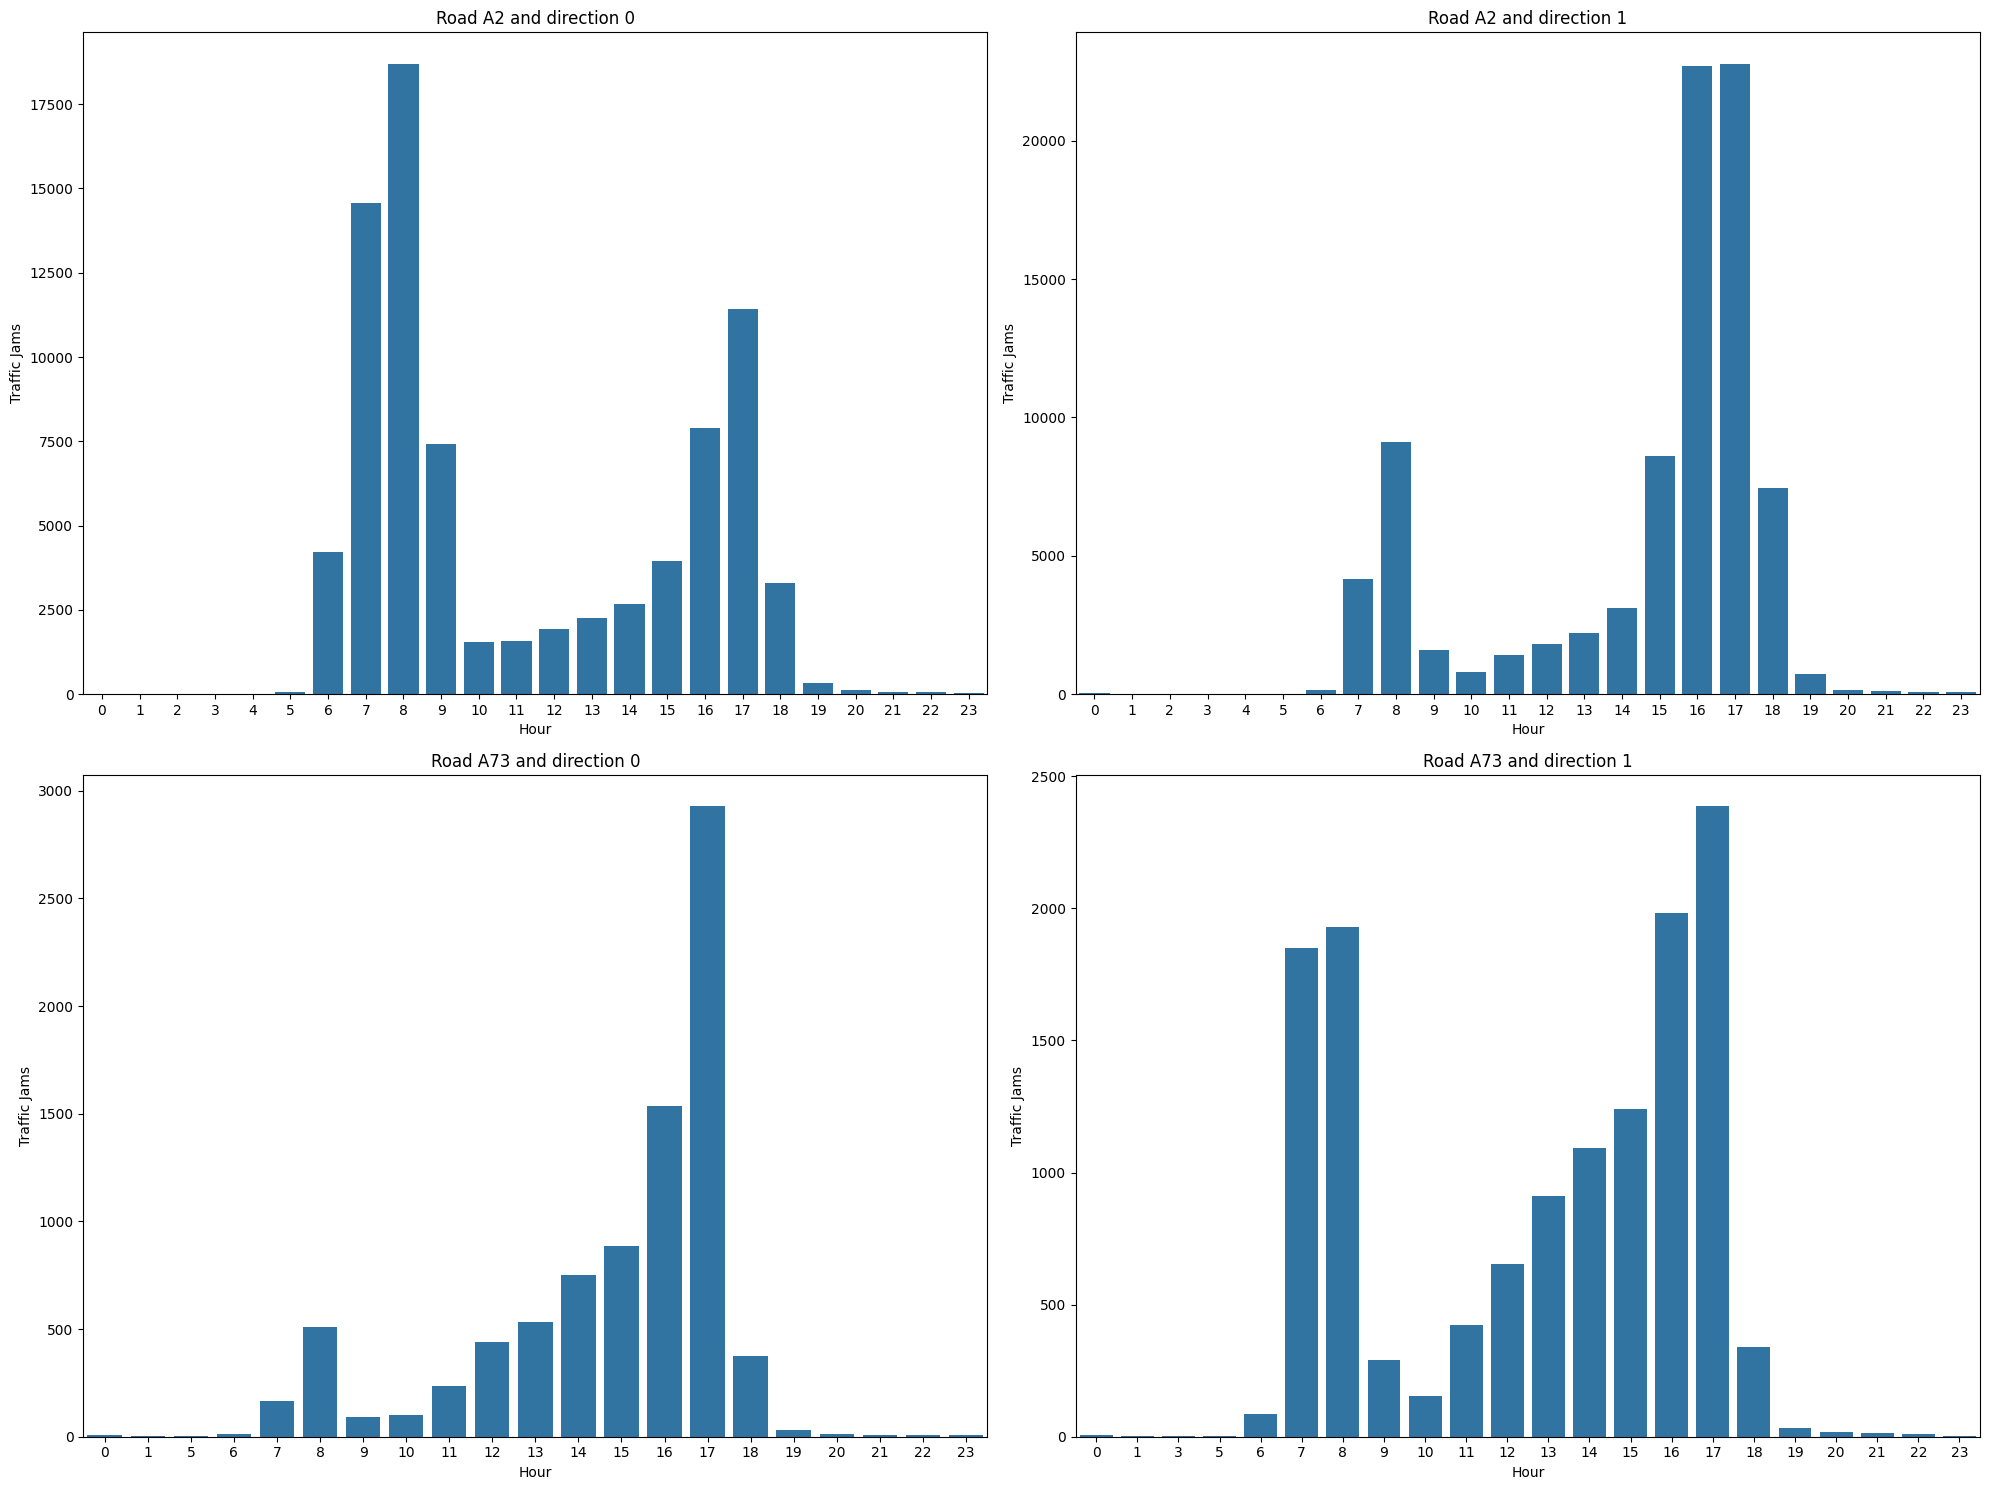

In [46]:
import seaborn as sns

actualtr0 = appended_frame[(appended_frame['Duration']!=0)&(appended_frame['HectometerDirectionNum']==0)&(appended_frame['RoadNumber']==2)]
actualtr0 = actualtr0['Hour'].value_counts().sort_index() 

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.barplot(x=actualtr0.index, y=actualtr0.values, ax = axes[0,0])
axes[0, 0].set_title('Road A2 and direction 0')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Traffic Jams')


actualtr1 = appended_frame[(appended_frame['Duration']!=0)&(appended_frame['HectometerDirectionNum']==1)&(appended_frame['RoadNumber']==2)]
actualtr1 = actualtr1['Hour'].value_counts().sort_index()

sns.barplot(x=actualtr1.index, y=actualtr1.values, ax = axes[0,1])
axes[0, 1].set_title('Road A2 and direction 1')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Traffic Jams')

actualtr2 = appended_frame[(appended_frame['Duration']!=0)&(appended_frame['HectometerDirectionNum']==0)&(appended_frame['RoadNumber']==73)]
actualtr2 = actualtr2['Hour'].value_counts().sort_index() 


sns.barplot(x=actualtr2.index, y=actualtr2.values, ax = axes[1,0])
axes[1, 0].set_title('Road A73 and direction 0')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Traffic Jams')


actualtr3 = appended_frame[(appended_frame['Duration']!=0)&(appended_frame['HectometerDirectionNum']==1)&(appended_frame['RoadNumber']==73)]
actualtr3 = actualtr3['Hour'].value_counts().sort_index()

sns.barplot(x=actualtr3.index, y=actualtr3.values, ax = axes[1,1])
axes[1, 1].set_title('Road A73 and direction 1')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Traffic Jams')

plt.tight_layout()
plt.show()

In [32]:
appended_frame

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
0,2015-01-01,0,0.0,2.0,0.0,0.0
1,2015-01-01,1,0.0,2.0,0.0,0.0
2,2015-01-01,2,0.0,2.0,0.0,0.0
3,2015-01-01,3,0.0,2.0,0.0,0.0
4,2015-01-01,4,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...
89613,2024-02-28,20,0.0,73.0,1.0,0.0
89614,2024-02-28,21,0.0,73.0,1.0,0.0
89615,2024-02-28,22,0.0,73.0,1.0,0.0
89616,2024-02-28,23,0.0,73.0,1.0,0.0


### Exporting the file

In [167]:
appended_frame.to_csv("datasets/LeftJoin.csv", index=False)